# Sales Data Analysis

This dataset is about sales of an electronics store with products, their id's, quantity ordered, cost, order date and purchase address.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings("ignore")

## Merging Data Frames into One

In [2]:
# Merging 12 months sales data into a single file

sales_12m = ["Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv","Sales_April_2019.csv",
             "Sales_May_2019.csv",  "Sales_June_2019.csv", "Sales_July_2019.csv", "Sales_August_2019.csv",
            "Sales_September_2019.csv", "Sales_November_2019.csv", "Sales_October_2019.csv", "Sales_December_2019.csv",]

sales_dataframe = pd.concat(map(pd.read_csv, sales_12m), ignore_index = True)

sales_dataframe.to_csv("12m_Sales") #turning the dataframe into a single csv 

## Read Updated Dataframe

In [3]:
sales_data = pd.read_csv('12m_Sales')

sales_data.drop("Unnamed: 0", axis = 1, inplace = True) # Deleting an extra column used for index

sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


## Clean Data

In [4]:
# Removing NaN
sales_data[sales_data.isnull().any(axis = 1)]
sales_data = sales_data.dropna(how = 'all') 

# Removing Repeated header columns
sales_data = sales_data[sales_data["Order Date"].str[0:2] != "Or"]

# Converting numeric values to floats
sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"])
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])

## Which month had highest sales and what was the amount?

In [5]:
# Creating Month column
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"] = sales_data['Month'].astype("int32")

# Creating total sales column
sales_data["Total Sales"] = sales_data["Quantity Ordered"] * sales_data["Price Each"]

# groupby
sales_data.groupby('Month').sum()['Total Sales']
print("Highest Sales in 12th Month i.e., December and Amount is 4613443.34 dollars")

Highest Sales in 12th Month i.e., December and Amount is 4613443.34 dollars


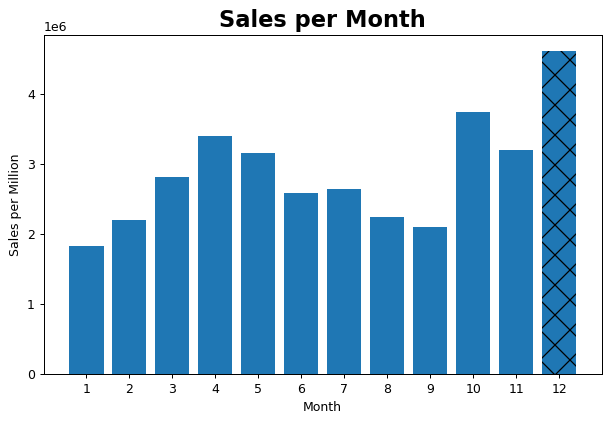

In [6]:
months = range(1,13)
results= sales_data.groupby('Month').sum()

plt.figure(figsize = (8, 5), dpi = 90)

bar = plt.bar(months, results['Total Sales'])

bar[11].set_hatch("x")

plt.title("Sales per Month", fontdict = {"fontweight": "bold", "fontsize": "18"})
plt.xlabel("Month")
plt.ylabel("Sales per Million")

plt.xticks(range(1,13))

plt.show()

Highest Sales were observed in 12th Month i.e., December with amount 4613443.34 dollars!

## Which city had most sales?

In [7]:
# Creating City Column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_data["City"] = sales_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

#Summary of details for each city, column-wise
city_result = sales_data.groupby(sales_data["City"]).sum()
city_result #run this to get the summary

#print("City: San Francisco\tAmount: 8262203.91 US Dollars")

,Quantity Ordered,Price Each,Month,Total Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


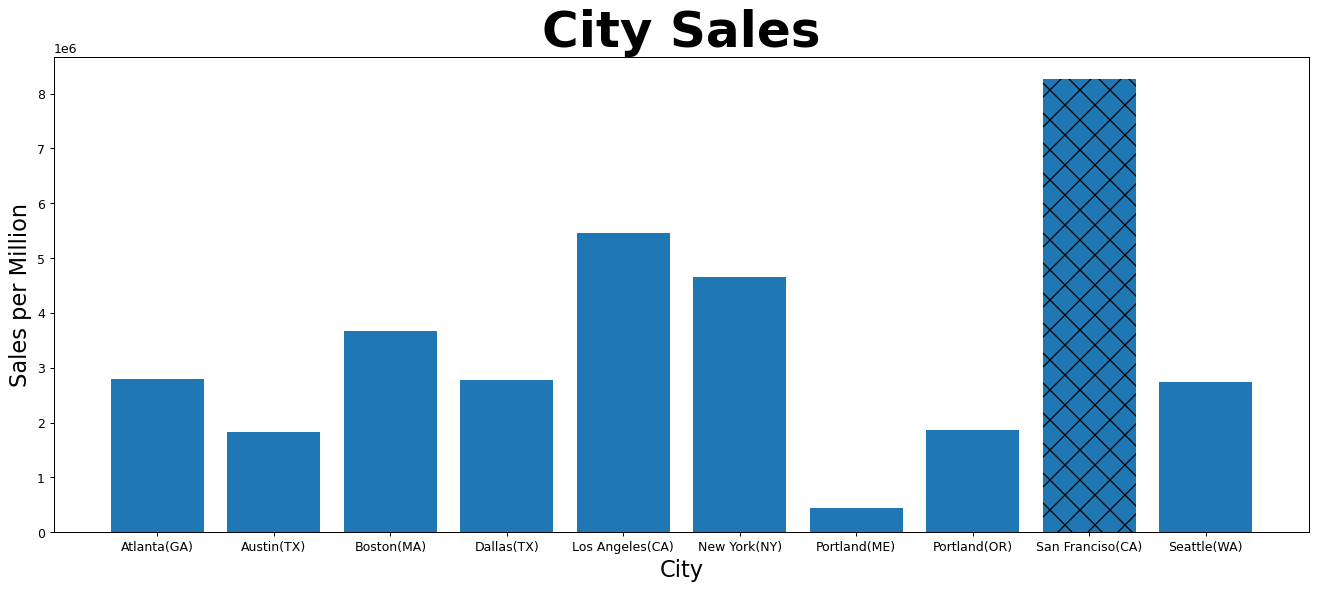

In [8]:
# Histogram to display above results
city = ['Atlanta(GA)', 'Austin(TX)', 'Boston(MA)', 'Dallas(TX)', 'Los Angeles(CA)', 'New York(NY)',
        'Portland(ME)', 'Portland(OR)', 'San Franciso(CA)','Seattle(WA)']

plt.figure(figsize = (18, 7), dpi = 90)

bar = plt.bar(city, city_result['Total Sales'])

bar[8].set_hatch("x")

plt.title("City Sales", fontdict = {"fontweight": "bold", "fontsize": "40"})
plt.xlabel("City", fontsize = '18')
plt.ylabel("Sales per Million", fontsize = '18')


plt.show()

As observed, the pattern shows that San Francisco had the highest sales

## Best Time for Advertisement

In [9]:
# Creating a new column
sales_data['Order Time'] = sales_data['Order Date'].str[8:]

#summing values for timed results
timed_result = sales_data.groupby(sales_data['Order Time']).sum()

#preventing summing of month
timed_result = timed_result.drop('Month', axis = 1)

# to get max results 
timed_result.max()

#to get time column included
timed_result.loc[timed_result['Quantity Ordered'] == 282]

,Quantity Ordered,Price Each,Total Sales
Order Time,,,
11:58,282,46425.49,46921.9


#### Approximation using hour

In [10]:
# Creating a new column
sales_data['Hour'] = sales_data['Order Date'].str[8:11]

#summing values for timed results
timed_result1 = sales_data.groupby(sales_data['Hour']).sum()

#preventing summing of month
timed_result1 = timed_result1.drop('Month', axis = 1)

# to get max results 
timed_result1

,Quantity Ordered,Price Each,Total Sales
Hour,,,
00,4428,709296.70,713721.27
01,2619,458490.00,460866.88
02,1398,233833.64,234851.44
03,928,144726.42,145757.89
04,937,162058.18,162661.01
05,1493,229621.21,230679.82
06,2810,445000.11,448113.00
07,4556,740568.11,744854.12
08,7002,1185970.62,1192348.97


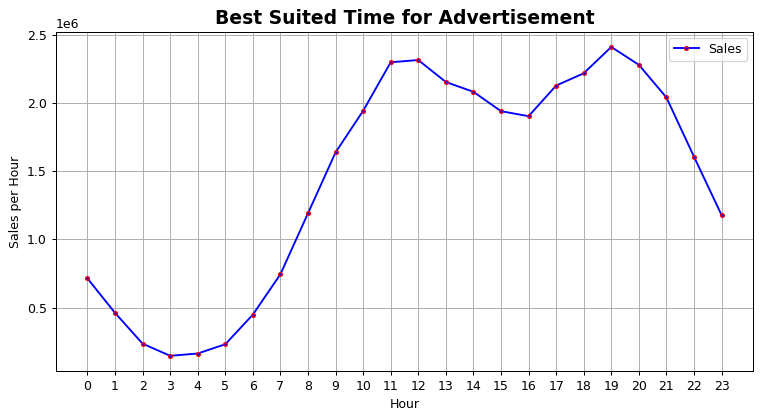

In [11]:
hours = range(0,24)
sales_per_hour = timed_result1['Total Sales']

plt.figure(figsize = (10, 5), dpi = 90)

plt.plot(hours, sales_per_hour, 'b.-', markeredgecolor = "red", label = "Sales")

plt.title("Best Suited Time for Advertisement", fontdict = {"fontweight": "bold", "fontsize": "15"})
plt.xlabel("Hour", fontsize = '10')
plt.ylabel("Sales per Hour", fontsize = '10')

plt.xticks(range(0,24,1))

plt.legend()
plt.grid()
plt.show()

The above graph shows that at the 19th hour most sales occur meaning the traffic is the highest during this time which is leading to this many sales. Hence, it is safe to say that the best time for advertisement is the 19th hour. Second most appropriate will be the 20th and 12th hour of the day

## Which products were sold together?

In [12]:
# Filtering duplicates of similar grouped products
duplicates = sales_data[sales_data['Order ID'].duplicated(keep = False)]

# New column 
duplicates["Grouped"] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Filtering repeated groups
duplicates = duplicates[['Order ID', 'Grouped']].drop_duplicates()
duplicates.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [13]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicates['Grouped']:
    row_list = row.split(',')
    count.update(combinations(row_list, 2))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

The above products were sold together. Meaning people preferred to buy these two products in pairs.

## Which product was sold the most?

In [14]:
most_sold = sales_data.groupby('Product').sum()
most_sold

,Quantity Ordered,Price Each,Month,Total Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


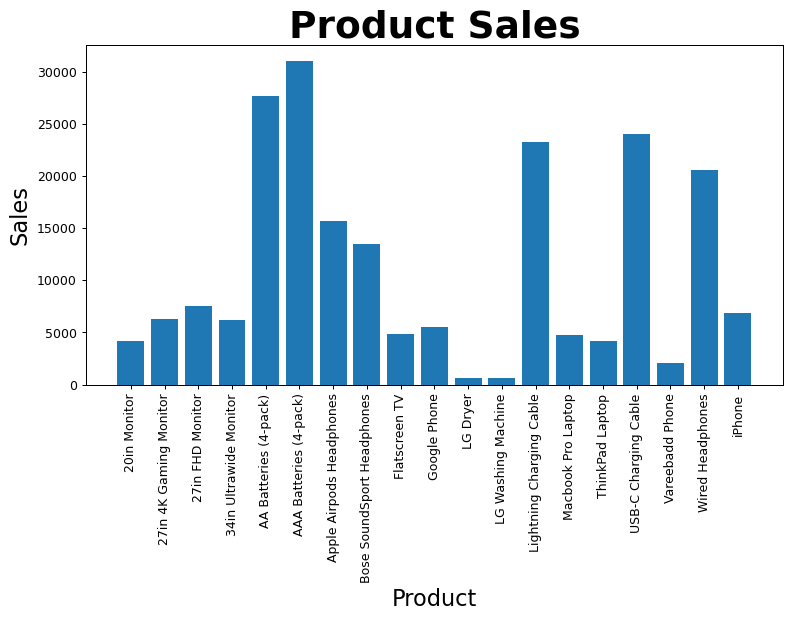

In [15]:
# Histogram
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, sales_data in product_group]

plt.figure(figsize = (10, 5), dpi = 90)

plt.bar(products, quantity_ordered)

plt.title("Product Sales", fontdict = {"fontweight": "bold", "fontsize": "30"})
plt.xlabel("Product", fontsize = '18')
plt.ylabel("Sales", fontsize = '18')

plt.xticks(products, rotation = 'vertical', size = 10)

plt.show()

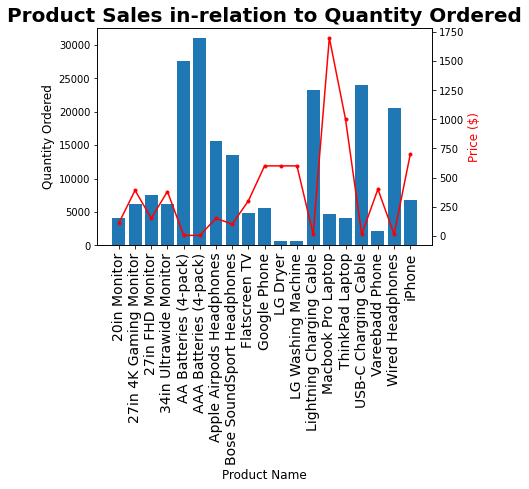

In [30]:
prices = sales_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'r.-')

plt.title("Product Sales in-relation to Quantity Ordered", fontdict = {"fontweight": "bold", "fontsize": "20"})
ax1.set_xlabel('Product Name', fontsize = '12')
ax1.set_ylabel('Quantity Ordered', fontsize = '12')
ax2.set_ylabel('Price ($)', color = "r",fontsize = '12')
ax1.set_xticklabels(products, rotation = 'vertical', size = 14)

plt.show()